# **Brute Force Motif Search**


---


### ***Question 1 : (A)***

The Brute Force Motif Search algorithm has a high computational complexity. Its time complexity is **O(l * (n - l + 1)^t)**, where:

- **n** is the sequence length,
- **t** is the number of sequences,
- **l** is the motif length.


---


### ***Breakdown of Time Complexity***

1. **Searching for Motifs:** The algorithm examines each possible starting position in the sequences. For each sequence of length \( n \), it checks \( n - l + 1 \) possible starting points for motifs of length \( l \). This results in a complexity of \( O(n - l + 1) \).

2. **Comparing Motifs:** For each of the \( t \) sequences, the algorithm compares the motif to each substring of length \( l \), leading to \( O(t) \) comparisons.

Combining these components, the overall time complexity is:

**O(l * (n - l + 1)^t)**



---



### ***Space Complexity***

The space complexity of the Brute Force Motif Search algorithm is O(t * l), as it stores the motifs of length l for t sequences and maintains a profile matrix of the same dimensions.



---


### ***Trade-offs***

- **Accuracy**: The Brute Force Motif Search is guaranteed to find the optimal motif, as it explores all possible starting positions in all sequences. This thorough approach ensures that no potential motif is overlooked.

- **Computational Cost**: The exhaustive search is computationally expensive, particularly for large \( n \) and \( t \). This makes it impractical for real-world large-scale problems, as the time required to execute the search can grow significantly.

While Brute Force offers accuracy, its high computational cost restricts its applicability to smaller datasets or to serve as a benchmark for evaluating faster algorithms.


---



In [ ]:
import csv
import time  # Import the time module

def read_dna_from_csv(file_path, num_lines):
    """Read DNA sequences from a CSV file."""
    dna = []
    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        for i, row in enumerate(reader):
            if i >= num_lines:  # Stop after reading the required number of lines
                break
            dna.append(row[0])  # Read the sequence
    return dna

def initialize_profile_matrix(l):
    """Initialize a profile matrix for A, C, G, T with zeros."""
    return {'A': [0] * l, 'C': [0] * l, 'G': [0] * l, 'T': [0] * l}

def count_motifs(motifs, l):
    """Count nucleotide occurrences in motifs and return the profile matrix."""
    profile_matrix = initialize_profile_matrix(l)
    for j in range(l):
        counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
        for motif in motifs:
            counts[motif[j].upper()] += 1
        for nucleotide in profile_matrix:
            profile_matrix[nucleotide][j] = counts[nucleotide]
    return profile_matrix

def find_consensus_and_score(profile_matrix, motifs, l):
    """Find the consensus string and calculate its score."""
    consensus = []
    score = 0
    for i in range(l):
        max_in_column, nucleotide = max((profile_matrix[nucleotide][i], nucleotide) for nucleotide in profile_matrix)
        score += max_in_column
        consensus.append(nucleotide)
    # Construct consensus string with the same case as the original motif
    consensus_str = ''.join([consensus[i].upper() if motifs[0][i].isupper() else consensus[i].lower() for i in range(l)])
    return consensus_str, score

def update_starting_indices(s, t, n, l):
    """Update starting indices in a multi-dimensional loop."""
    j = t - 1  # Start with the last sequence
    while j >= 0:
        if s[j] < n - l:
            s[j] += 1  # Increment start index
            break
        else:
            s[j] = 0  # Reset index if max is reached
            j -= 1
    return s

def print_best_motif(best_motif, best_score):
    """Print the best motif."""
    print("\n" + "="*40)
    print("Best Motif: " + best_motif)
    print("Best Score: " + str(best_score))
    print("="*40)

def print_all_best_motifs(best_motifs):
    """Print all best motifs that have the same best score."""
    print("\n" + "="*40)
    print("All Best Motifs (" + str(len(best_motifs)) + "):")
    for idx, motif in enumerate(best_motifs, start=1):
        print("  " + str(idx) + ". " + motif)
    print("="*40)

def brute_force_motif_search(dna, t, n, l):
    """Perform brute force motif search to find all the best motifs."""
    bestScore = 0
    bestMotifs = []
    s = [0] * t  # Initialize starting indices for each sequence
    total_iterations = (n - l + 1) ** t  # Calculate total iterations

    for _ in range(total_iterations):
        current_motifs = [dna[i][s[i]:s[i] + l] for i in range(t)]  # Extract motifs based on starting indices
        profile_matrix = count_motifs(current_motifs, l)
        consensus_str, score = find_consensus_and_score(profile_matrix, current_motifs, l)

        if score > bestScore:
            bestScore = score
            bestMotifs = [consensus_str]  # Reset the list with the new best motif
        elif score == bestScore:
            bestMotifs.append(consensus_str)  # Add to the list of best motifs with the same score

        s = update_starting_indices(s, t, n, l)  # Update indices for the next iteration

    print_best_motif(bestMotifs[0], bestScore)  # Print only the best motif
    print_all_best_motifs(bestMotifs)  # Print all best motifs

# Set the number of lines to read and hardcode motif length (l)
motif_length = 6
file_path = 'dna.csv'
num_lines_to_read = 4

# Read DNA sequences and calculate t and n dynamically
start_time = time.time()  # Start time measurement
DNA = read_dna_from_csv(file_path, num_lines_to_read)
t = len(DNA)
n = len(DNA[0])

# Run the Brute Force Motif Search
print("\n=== Brute Force Algorithm ===")
brute_force_motif_search(DNA, t, n, motif_length)

# Print the execution time
end_time = time.time()  # End time measurement
execution_time = end_time - start_time  # Calculate the execution time
print(f"\nExecution Time: {execution_time:.4f} seconds")  # Print the execution time



=== Brute Force Algorithm ===

Best Motif: gggcaa
Best Score: 21

All Best Motifs (4):
  1. gggcaa
  2. ggcaag
  3. ggcaag
  4. gcaagg

Execution Time: 34.5280 seconds


# **Median String Search**


---


### ***Question 1 : (B)***

The Median String Search algorithm aims to identify motifs by minimizing the total Hamming distance to a set of DNA sequences. Its overall time complexity is **O(4^l * n * m)**, where:

- **l** is the motif length,
- **n** is the number of sequences,
- **m** is the length of the longest sequence.


---


### ***Breakdown of Time Complexity***
1. **Generating All Possible l-mers:** The algorithm generates all possible l-mers from the DNA alphabet (A, T, C, G). This has a time complexity of **O(4^l)**, as there are \( 4^l \) possible combinations for a motif of length \( l \).

2. **Calculating Minimum Distance:** For each generated l-mer, the algorithm calculates the minimum Hamming distance to all sequences:
   - For each sequence (O(n)), it compares substrings of length \( l \) (which can involve up to \( m - l + 1 \) comparisons). This gives a complexity of **O(n * m)** for this step.

Combining these components, the overall time complexity is thus expressed as:
**O(4^l * n * m)**

---

### ***Space Complexity***
The space complexity of the Median String Search algorithm is O(4^l), as it needs to store all possible l-mers generated from the DNA alphabet. This grows exponentially with the motif length
𝑙
l.

---


### ***Trade-offs***

- **Accuracy**: The Median String Search effectively finds motifs that accurately represent the underlying data, capturing biologically relevant patterns. By minimizing discrepancies among sequences, it provides reliable results.

- **Computational Cost**: The algorithm's computational demands grow exponentially with increasing motif length \( l \). The high complexity can limit its practicality for longer motifs or larger datasets, making it challenging to use in real-time applications or extensive genomic studies.

While the Median String Search excels in accuracy, its significant computational cost can restrict its applicability, particularly with large datasets or when longer motifs are required.


---



In [ ]:
import csv
from itertools import product
import time  # Import the time module

# Function to read DNA sequences from a CSV file
def read_dna_from_csv(file_path):
    """Read DNA sequences from a CSV file and return them as a list."""
    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        return [row[0].upper() for row in reader]

# Function to compute Hamming distance between two strings
def hamming_distance(s1, s2):
    """Compute the Hamming distance between two strings."""
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

# Function to compute the minimum distance of a l-mer to all sequences
def min_distance_to_sequences(lmer, D):
    """Compute the minimum distance of a given l-mer to all sequences in D."""
    return sum(min(hamming_distance(lmer, seq[i:i + len(lmer)]) for i in range(len(seq) - len(lmer) + 1)) for seq in D)

# Function to generate all possible l-mer strings from the DNA alphabet
def generate_all_lmers(alphabet, length):
    """Generate all possible l-mer strings from the given alphabet."""
    return [''.join(p) for p in product(alphabet, repeat=length)]

# Function to find the best l-mers and their minimum total distance
def find_best_lmers(D, l, alphabet):
    """Find the best l-mers and their minimum total distance."""
    all_lmers = generate_all_lmers(alphabet, l)
    best_lmers = []
    min_total_distance = float('inf')

    for lmer in all_lmers:
        dist = min_distance_to_sequences(lmer, D)
        if dist < min_total_distance:
            min_total_distance = dist
            best_lmers = [lmer]
        elif dist == min_total_distance:
            best_lmers.append(lmer)

    return best_lmers, min_total_distance

# Main function to execute the motif search
def main():
    start_time = time.time()  # Start time measurement
    file_path = 'dna.csv'
    D = read_dna_from_csv(file_path)
    l = 6  # Length of the l-mer strings to search for
    alphabet = "ACGT"

    best_lmers, min_total_distance = find_best_lmers(D, l, alphabet)

    # Output the result with enhanced formatting
    print("\n===============================")
    print("     Best l-Mers Results      ")
    print("===============================")
    print(f"Best l-mers: {', '.join(best_lmers)}")
    print(f"Minimum Total Distance: {min_total_distance}")
    print("===============================")

    end_time = time.time()  # End time measurement
    execution_time = end_time - start_time  # Calculate the execution time
    print(f"\nExecution Time: {execution_time:.4f} seconds")  # Print the execution time

if __name__ == "__main__":
    main()



     Best l-Mers Results      
Best l-mers: GGGCAA
Minimum Total Distance: 21

Execution Time: 5.1513 seconds


# **Gibbs Sampler for Motif Finding**

---

### ***Question 1 : (C)***

The Gibbs Sampler algorithm aims to identify motifs in DNA sequences by iteratively refining a set of k-mers based on their likelihood given the surrounding motifs. Its overall time complexity is **O(n * t * k * n)**, where:

- **n** is the number of iterations (samplings),
- **t** is the number of DNA sequences,
- **k** is the length of the motif.

---

### ***Breakdown of Time Complexity***
1. **Initialization of Motifs:** The algorithm begins by randomly selecting initial k-mers from each DNA sequence. This step has a time complexity of **O(t * k)**, where \( t \) is the number of sequences and \( k \) is the motif length.

2. **Profile Matrix Calculation:** For each iteration, the algorithm constructs a profile matrix based on the current set of motifs (excluding one motif). This calculation involves iterating through the motifs to update counts, which takes **O(t * k)** time.

3. **Selecting New Motifs:** The Gibbs Sampler selects a new k-mer based on the calculated profile probabilities. This requires computing the probability of all possible k-mers in the excluded sequence, resulting in a complexity of **O(k * m)**, where \( m \) is the length of the sequence.

Combining these components, the overall time complexity is expressed as:
**O(n * t * k * m)**

---

### ***Space Complexity***
The space complexity of the Gibbs Sampler algorithm is **O(t * k)**, as it needs to store the current motifs and the profile matrix, which grows linearly with the number of sequences and the motif length.

---

### ***Trade-offs***

- **Flexibility**: The Gibbs Sampler can adapt to different motifs across diverse sequences, allowing it to capture biologically relevant patterns effectively. It can identify motifs that may not be strictly conserved across all sequences.

- **Computational Cost**: The algorithm's efficiency decreases with an increasing number of iterations \( n \) and larger datasets, as it requires multiple computations of profile matrices and probabilities. This can make it less suitable for very large datasets or when rapid results are required.

While the Gibbs Sampler excels in identifying motifs with biological relevance and adaptability, its computational cost can become a limiting factor, particularly in scenarios with extensive sequences or a high number of iterations.

In [58]:
import csv
import numpy as np
from collections import Counter
import time

class MotifFinder:
    def __init__(self, filename, motif_length, iterations):
        self.filename = filename
        self.motif_length = motif_length
        self.iterations = iterations
        self.sequences = self.extract_sequences_from_csv()
        self.lmers = []
        self.scores = []

    def extract_sequences_from_csv(self):
        """Extract sequences from a CSV file."""
        sequences = []
        with open(self.filename, newline='') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                if row:  # Check if the row is not empty
                    sequences.append(row[0].upper())  # Convert to uppercase
        return sequences

    def calculate_profile(self):
        """Calculate the profile matrix from the current lmers."""
        profile = np.ones((4, self.motif_length))  # Initialize with pseudocounts
        for seq in self.lmers:
            for i, nucleotide in enumerate(seq):
                if nucleotide == 'A':
                    profile[0][i] += 1
                elif nucleotide == 'C':
                    profile[1][i] += 1
                elif nucleotide == 'G':
                    profile[2][i] += 1
                elif nucleotide == 'T':
                    profile[3][i] += 1
        return profile / profile.sum(axis=0)  # Normalize profile

    def calculate_probabilities(self, lmer, profile):
        """Calculate the probability of a l-mer given the profile."""
        prob = 1
        for i, nucleotide in enumerate(lmer):
            if nucleotide == 'A':
                prob *= profile[0][i]
            elif nucleotide == 'C':
                prob *= profile[1][i]
            elif nucleotide == 'G':
                prob *= profile[2][i]
            elif nucleotide == 'T':
                prob *= profile[3][i]
        return prob

    def calculate_score(self):
        """Calculate the score of current lmers."""
        score = 0
        for j in range(self.motif_length):
            column = [motif[j] for motif in self.lmers]
            most_common_count = Counter(column).most_common(1)[0][1]
            score += most_common_count
        return score

    def gibbs_sampling(self):
        """Perform Gibbs Sampling to find motifs."""
        num_sequences = len(self.sequences)
        sequence_length = len(self.sequences[0])

        # Step 1: Randomly choose starting positions
        for seq in self.sequences:
            start = np.random.randint(0, sequence_length - self.motif_length + 1)
            self.lmers.append(seq[start:start + self.motif_length])

        for iteration in range(1, self.iterations + 1):
            # Step 2: Randomly choose one of the sequences
            removed_index = np.random.randint(0, num_sequences)
            removed_sequence = self.sequences[removed_index]

            # Step 3: Create a profile from the other sequences
            profile = self.calculate_profile()

            # Step 4: Calculate probabilities for the removed sequence
            probabilities = []
            for i in range(len(removed_sequence) - self.motif_length + 1):
                lmer = removed_sequence[i:i + self.motif_length]
                probabilities.append(self.calculate_probabilities(lmer, profile))

            # Normalize probabilities
            min_prob = min(probabilities)
            ratios = [p / min_prob for p in probabilities]
            total_ratio = sum(ratios)
            normalized_ratios = [r / total_ratio for r in ratios]

            # Step 5: Choose a new starting position based on normalized ratios
            new_position = np.random.choice(len(normalized_ratios), p=normalized_ratios)
            self.lmers[removed_index] = removed_sequence[new_position:new_position + self.motif_length]

            # Calculate and store the score
            score = self.calculate_score()
            self.scores.append(score)
            print(f"Iteration: {iteration} -> Score: {score}")

        average_score = sum(self.scores) / len(self.scores)
        return self.lmers, average_score

    def calculate_consensus(self):
        """Calculate the consensus sequence from current lmers."""
        consensus = ""
        for j in range(self.motif_length):
            column = [motif[j] for motif in self.lmers]
            most_common = Counter(column).most_common(1)[0][0]
            consensus += most_common
        return consensus

    def print_results(self, motifs, consensus, average_score, time_taken):
        """Print results in a well-formatted manner."""
        print("\n" + "="*50)
        print("Motif Finder Results".center(50))
        print("="*50)
        print(f"Motifs: {motifs}")
        print(f"Consensus Sequence: {consensus}")
        print(f"Average Score: {average_score:.2f}")
        print(f"Time Taken: {time_taken:.2f} seconds")
        print("="*50 + "\n")

# Example usage
filename = 'dna.csv'
motif_length = 6  # Motif length
iterations = 1000  # Number of iterations for Gibbs sampler

start_time = time.time()
motif_finder = MotifFinder(filename, motif_length, iterations)
motifs, average_score = motif_finder.gibbs_sampling()
end_time = time.time()
consensus = motif_finder.calculate_consensus()
time_taken_gibbs = end_time - start_time

# Print results
motif_finder.print_results(motifs, consensus, average_score, time_taken_gibbs)


Iteration: 1 -> Score: 55
Iteration: 2 -> Score: 55
Iteration: 3 -> Score: 59
Iteration: 4 -> Score: 60
Iteration: 5 -> Score: 58
Iteration: 6 -> Score: 60
Iteration: 7 -> Score: 63
Iteration: 8 -> Score: 63
Iteration: 9 -> Score: 63
Iteration: 10 -> Score: 61
Iteration: 11 -> Score: 63
Iteration: 12 -> Score: 62
Iteration: 13 -> Score: 61
Iteration: 14 -> Score: 63
Iteration: 15 -> Score: 62
Iteration: 16 -> Score: 61
Iteration: 17 -> Score: 63
Iteration: 18 -> Score: 64
Iteration: 19 -> Score: 64
Iteration: 20 -> Score: 64
Iteration: 21 -> Score: 62
Iteration: 22 -> Score: 60
Iteration: 23 -> Score: 65
Iteration: 24 -> Score: 65
Iteration: 25 -> Score: 61
Iteration: 26 -> Score: 62
Iteration: 27 -> Score: 63
Iteration: 28 -> Score: 64
Iteration: 29 -> Score: 65
Iteration: 30 -> Score: 66
Iteration: 31 -> Score: 64
Iteration: 32 -> Score: 67
Iteration: 33 -> Score: 66
Iteration: 34 -> Score: 66
Iteration: 35 -> Score: 66
Iteration: 36 -> Score: 69
Iteration: 37 -> Score: 66
Iteration:

# **Consensus Motif Analysis Results**
# **Question 2**

---


## ***Brute Force Algorithm***
This has been runned for 4 sequences only .

**Best Motif:** `gggcaa`  
**Best Score:** `21`  

**All Best Motifs (4):**  
1. `gggcaa`  
2. `ggcaag`  
3. `ggcaag`  
4. `gcaagg`  

**Execution Time:** `34.5280 seconds`  

---

## ***Median String Algorithm***
This has been run for whole sequnce .

**Best l-Mers:** `GGGCAA`  
**Minimum Total Distance:** `21`  
**Execution Time:** `5.1513 seconds`  

---

## ***Gibbs Sampling Algorithm***
==================================================
               Motif Finder Results               
==================================================

Motifs :  ['GGGCAA', 'GGGCCA', 'GATGAA', 'GGGCAA', 'CGTTCA', 'GGGCAA', 'GGGCAA', 'GGGGAA', 'GGGCTA', 'GGCCAA', 'GGGCAA', 'GCGCAA', 'GGGCAA', 'CGGCAA', 'GGTCAA', 'GGGTAA', 'GGGCAA', 'GGTCAA', 'GGGTAA', 'GGGCTA', 'CGGGAA', 'CGGGAA', 'GGGCGA', 'GGGCAA', 'GGGGAG', 'GAGCAA']

Consensus Sequence: GGGCAA

Average Score: 122.72

Time Taken: 0.90 seconds


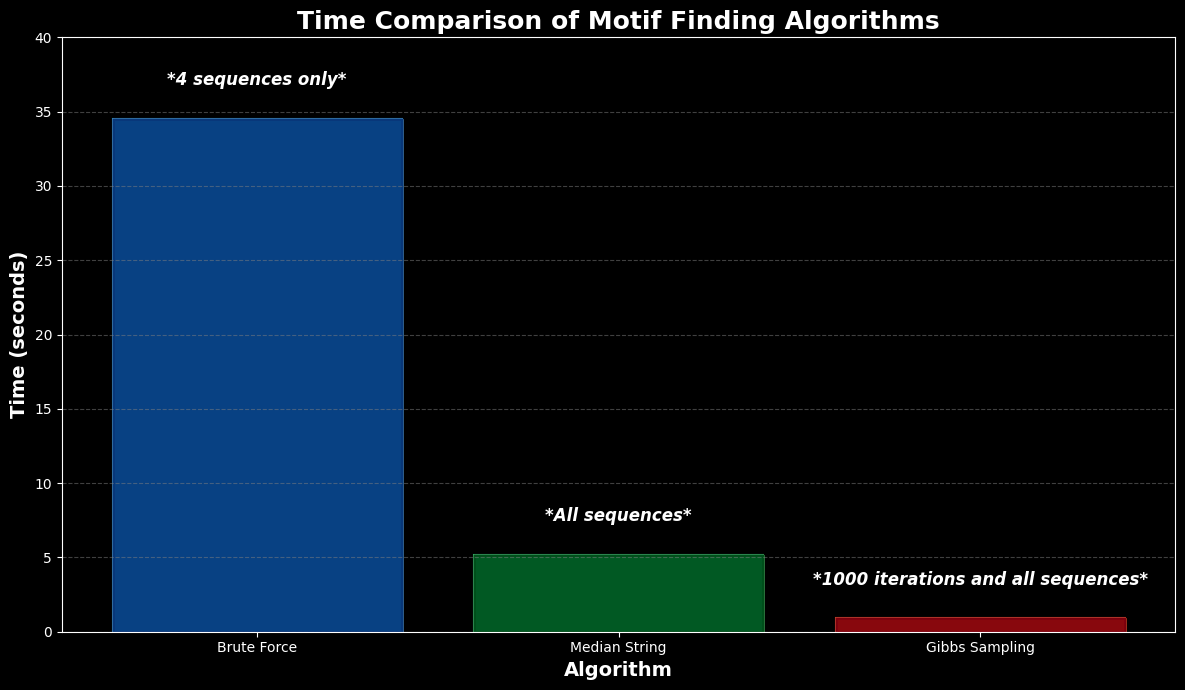

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Hardcoded time values for each algorithm (in seconds)
Brute_Force = 34.5280
Median_String = 5.1513
Gibbs_Sampling = 0.90

# Method names and corresponding times
methods = ['Brute Force', 'Median String', 'Gibbs Sampling']
times = [Brute_Force, Median_String, Gibbs_Sampling]

# Set a dark background
plt.style.use('dark_background')

# Create a figure
plt.figure(figsize=(12, 7))

# Define colors and gradients for the bars
bar_colors = ['#2c3e50', '#34495e', '#7f8c8d']  # Dark colors for bars
highlight_colors = ['#2980b9', '#27ae60', '#c0392b']  # Lighter colors for highlight

# Plotting the bars with gradient effect
bars = []
for i, (method, time) in enumerate(zip(methods, times)):
    bar = plt.bar(method, time, color=bar_colors[i], edgecolor=highlight_colors[i], linewidth=1.5)
    bars.append(bar)  # Store the bar for annotations
    # Create a gradient effect for each bar
    for j in np.linspace(0, 1, 100):
        plt.fill_betweenx([0, time], bar[0].get_x(), bar[0].get_x() + bar[0].get_width(),
                           color=plt.cm.Blues(j) if i == 0 else plt.cm.Greens(j) if i == 1 else plt.cm.Reds(j), alpha=0.1)

plt.title('Time Comparison of Motif Finding Algorithms', fontsize=18, fontweight='bold', color='white')
plt.xlabel('Algorithm', fontsize=14, fontweight='bold', color='white')
plt.ylabel('Time (seconds)', fontsize=14, fontweight='bold', color='white')

# Adding annotations on each bar with more spacing
plt.text(bars[0][0].get_x() + bars[0][0].get_width() / 2, bars[0][0].get_height() + 2,
         '*4 sequences only*', ha='center', va='bottom', fontsize=12, fontweight='bold', style='italic', color='white')
plt.text(bars[1][0].get_x() + bars[1][0].get_width() / 2, bars[1][0].get_height() + 2,
         '*All sequences*', ha='center', va='bottom', fontsize=12, fontweight='bold', style='italic', color='white')
plt.text(bars[2][0].get_x() + bars[2][0].get_width() / 2, bars[2][0].get_height() + 2,
         '*1000 iterations and all sequences*', ha='center', va='bottom', fontsize=12, fontweight='bold', style='italic', color='white')

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5, color='gray')

# Adjusting the y-axis limit for better spacing
plt.ylim(0, 40)

plt.tight_layout()  # Adjusts spacing to make room for text
plt.show()




---

### Question 3

(a) **Visualize the changes in the consensus motif score** with each iteration during the Gibbs sampling process. This will help in understanding how the algorithm converges over iterations.

(b) **Design and conduct an experiment** to account for the inherent randomness in Gibbs sampling by running the algorithm multiple times. Analyze and plot the distribution of consensus motif counts and average scores obtained during the experiments. This will provide insights into the variability and reliability of the results generated by the Gibbs sampling approach.

---



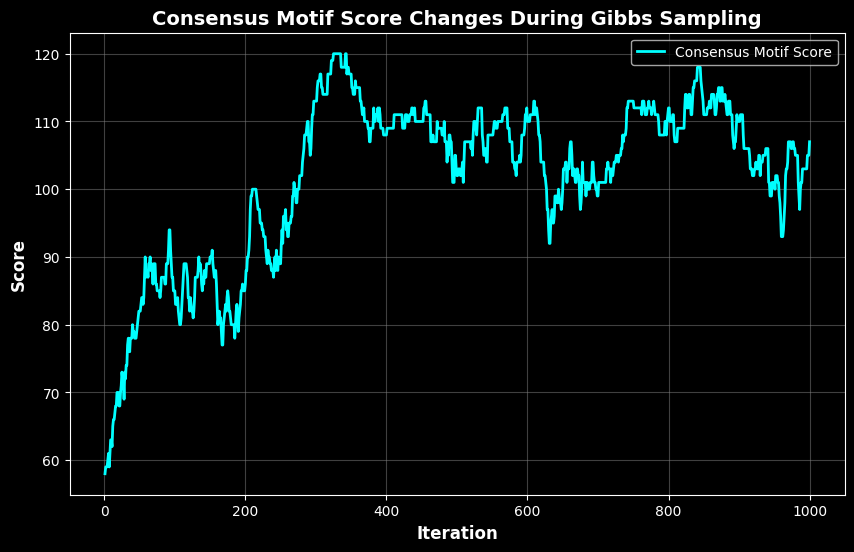

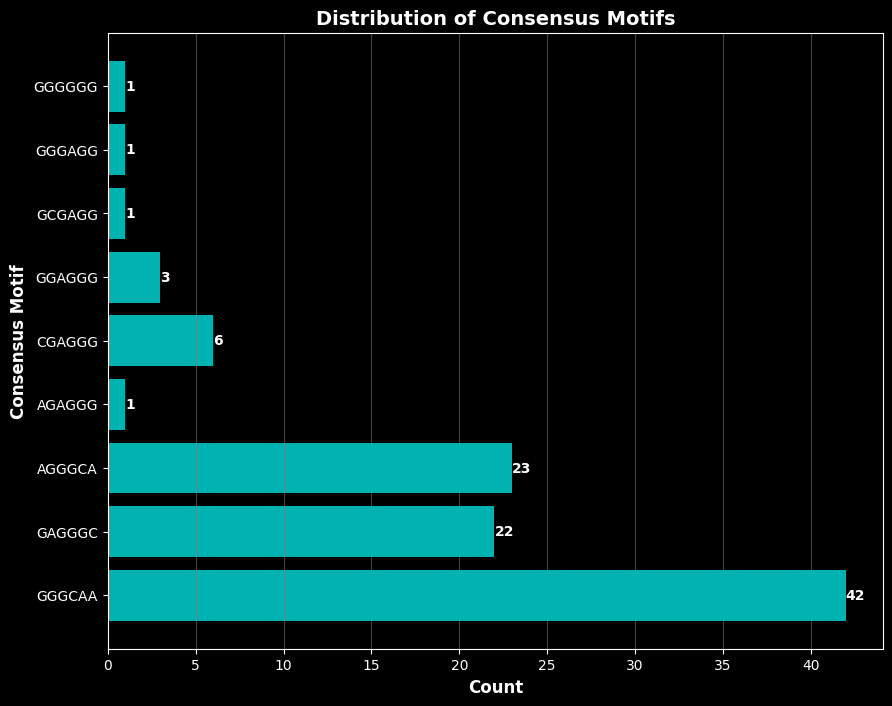

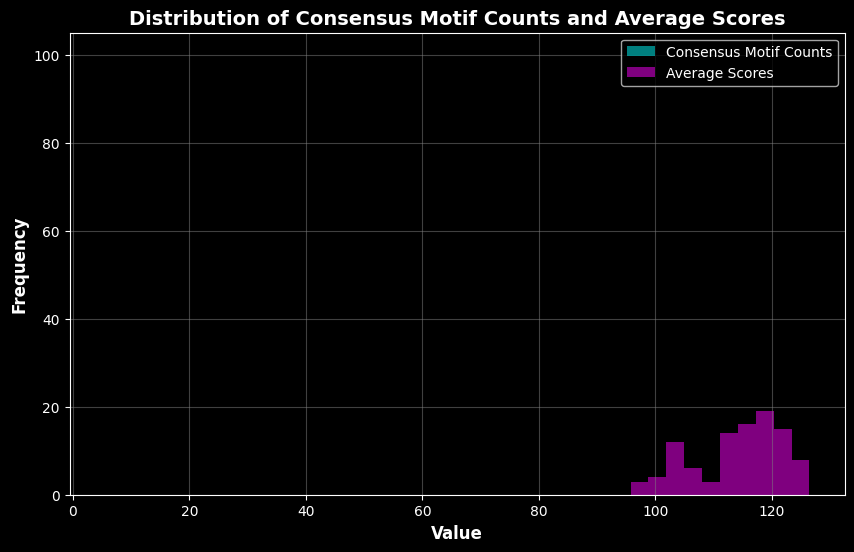

In [59]:
import csv
import numpy as np
from collections import Counter
import time
import matplotlib.pyplot as plt

def extract_sequences_from_csv(filename):
    """Extract sequences from a CSV file."""
    with open(filename, newline='') as csvfile:
        return [row[0].upper() for row in csv.reader(csvfile) if row]  # Convert to uppercase

def calculate_profile(sequences, l):
    """Calculate the profile matrix from the given sequences."""
    profile = np.ones((4, l))  # Initialize with pseudocounts
    nucleotide_index = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

    for seq in sequences:
        for i, nucleotide in enumerate(seq):
            profile[nucleotide_index[nucleotide]][i] += 1

    return profile / profile.sum(axis=0)  # Normalize

def calculate_probabilities(profile, lmer):
    """Calculate the probability of a l-mer given the profile."""
    indices = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    return np.prod([profile[indices[nucleotide], i] for i, nucleotide in enumerate(lmer)])

def calculate_score(motifs):
    """Calculate the score of given motifs."""
    l_mer = len(motifs[0])
    return sum(Counter(motif[j] for motif in motifs).most_common(1)[0][1] for j in range(l_mer))

def initialize_lmers(sequences, l):
    """Randomly choose l-mers from the sequences."""
    return [seq[np.random.randint(0, len(seq) - l + 1):][:l] for seq in sequences]

def normalize_probabilities(probabilities):
    """Normalize probabilities to sum to 1."""
    total = sum(probabilities)
    return [p / total for p in probabilities]

def gibbs_sampling(sequences, l, iterations=1000):
    """Perform Gibbs Sampling to find motifs."""
    lmers = initialize_lmers(sequences, l)
    scores = []

    for _ in range(iterations):
        removed_index = np.random.randint(len(sequences))
        profile_sequences = [lmers[i] for i in range(len(sequences)) if i != removed_index]
        profile = calculate_profile(profile_sequences, l)

        removed_sequence = sequences[removed_index]
        probabilities = [calculate_probabilities(profile, removed_sequence[i:i + l])
                         for i in range(len(removed_sequence) - l + 1)]

        normalized_ratios = normalize_probabilities(probabilities)
        new_position = np.random.choice(len(normalized_ratios), p=normalized_ratios)
        lmers[removed_index] = removed_sequence[new_position:new_position + l]

        scores.append(calculate_score(lmers))

    return lmers, np.mean(scores), scores

def calculate_consensus(motifs):
    """Calculate the consensus sequence from motifs."""
    consensus = ""
    for j in range(len(motifs[0])):
        most_common = Counter(motif[j] for motif in motifs).most_common(1)[0][0]
        consensus += most_common
    return consensus

def plot_scores(iterations, scores):
    """Plot the scores over iterations with a dark theme."""
    plt.style.use('dark_background')
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, iterations + 1), scores, color='cyan', linewidth=2, label='Consensus Motif Score')
    plt.xlabel('Iteration', fontsize=12, color='white', fontweight='bold')
    plt.ylabel('Score', fontsize=12, color='white', fontweight='bold')
    plt.title('Consensus Motif Score Changes During Gibbs Sampling', fontsize=14, color='white', fontweight='bold')
    plt.legend()
    plt.grid(True, color='gray', alpha=0.5)
    plt.show()

def run_experiments(sequences, l_mer, iterations, num_experiments):
    """Run multiple experiments to analyze consensus and average scores."""
    all_consensus_counts, all_average_scores, all_consensus_sequences = [], [], []

    for _ in range(num_experiments):
        motifs, average_score, _ = gibbs_sampling(sequences, l_mer, iterations)
        consensus = calculate_consensus(motifs)
        consensus_count = calculate_score([consensus])
        all_consensus_counts.append(consensus_count)
        all_average_scores.append(average_score)
        all_consensus_sequences.append(consensus)  # Store consensus sequences

    return all_consensus_counts, all_average_scores, all_consensus_sequences

def plot_distribution(all_consensus_counts, all_average_scores):
    """Plot the distribution of consensus motif counts and average scores with a dark theme."""
    plt.style.use('dark_background')
    plt.figure(figsize=(10, 6))
    plt.hist(all_consensus_counts, bins=10, alpha=0.5, color='cyan', label='Consensus Motif Counts')
    plt.hist(all_average_scores, bins=10, alpha=0.5, color='magenta', label='Average Scores')
    plt.xlabel('Value', fontsize=12, color='white', fontweight='bold')
    plt.ylabel('Frequency', fontsize=12, color='white', fontweight='bold')
    plt.title('Distribution of Consensus Motif Counts and Average Scores', fontsize=14, color='white', fontweight='bold')
    plt.legend()
    plt.grid(True, color='gray', alpha=0.5)
    plt.show()

def plot_consensus_distribution(all_consensus_sequences):
    """Plot the distribution of consensus sequences with counts."""
    consensus_counter = Counter(all_consensus_sequences)
    consensus_motifs, counts = zip(*consensus_counter.items())

    # Create a horizontal bar plot for better visibility
    plt.style.use('dark_background')
    plt.figure(figsize=(10, 8))
    bars = plt.barh(consensus_motifs, counts, color='cyan', alpha=0.7)

    # Add counts on top of each bar
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                 f'{int(bar.get_width())}',
                 va='center', ha='left', color='white', fontsize=10, fontweight='bold')

    plt.xlabel('Count', fontsize=12, color='white', fontweight='bold')
    plt.ylabel('Consensus Motif', fontsize=12, color='white', fontweight='bold')
    plt.title('Distribution of Consensus Motifs', fontsize=14, color='white', fontweight='bold')
    plt.grid(axis='x', color='gray', alpha=0.5)
    plt.show()

# Example usage with sequences from a CSV file
filename = 'dna.csv'
sequences = extract_sequences_from_csv(filename)
l_mer = 6  # Motif length
iterations = 1000  # Number of iterations for Gibbs sampler
num_experiments = 100

# Part a: Visualize consensus motif score changes
start_time = time.time()
motifs, average_score, scores = gibbs_sampling(sequences, l_mer, iterations)
end_time = time.time()
consensus = calculate_consensus(motifs)
time_taken_gibbs = end_time - start_time

# Plot scores
plot_scores(iterations, scores)

# Part b: Run the experiment multiple times
all_consensus_counts, all_average_scores, all_consensus_sequences = run_experiments(sequences, l_mer, iterations, num_experiments)

# Plot consensus distribution
plot_consensus_distribution(all_consensus_sequences)
# Plot distribution
plot_distribution(all_consensus_counts, all_average_scores)




# **QUESTION 4 :**
---

### **Median String Search**
**Improvements:**
- **Pruning Search Space**: Implement heuristics to strategically narrow down the pool of candidate l-mers. By focusing on sequences with a higher likelihood of containing motifs, the search can become more efficient.
- **Parallel Processing**: Leverage parallel computation to assess multiple l-mers concurrently, significantly reducing overall computation time and improving scalability.
- **Approximate Matching**: Develop algorithms to swiftly eliminate unlikely l-mers based on their distance from known motifs, thus streamlining the search process.

**Enhancements:**
- **Heuristic Search**: Explore advanced search techniques such as genetic algorithms or simulated annealing, which adaptively refine candidate selection to converge on optimal motifs more effectively.
- **Data Preprocessing**: Prioritize analysis in regions with a higher density of motifs. Techniques such as sliding windows or density-based clustering can help identify these high-potential areas.
- **Caching Mechanisms**: Implement caching strategies to store and reuse previously computed results, thereby minimizing redundant calculations and accelerating the overall search process.

### **Gibbs Sampling**
**Improvements:**
- **Adaptive Sampling**: Introduce an adaptive sampling mechanism that modifies the sampling approach based on the observed convergence rate, improving efficiency and accuracy over time.
- **Incremental Profile Updating**: Update the profile matrix incrementally instead of recalculating from scratch each iteration, which can save computation time and resources.
- **Sophisticated Convergence Criteria**: Develop advanced criteria for early termination of the algorithm, such as statistical tests or predefined thresholds based on stability metrics.

**Enhancements:**
- **Multiple Runs for Aggregated Results**: Conduct multiple independent runs of the Gibbs sampler to gather a more comprehensive set of results, allowing for a more robust consensus motif.
- **Parallel Gibbs Sampling**: Execute multiple Gibbs sampling instances simultaneously on different processors to enhance throughput and decrease total runtime.
- **Hybrid Optimization Methods**: Combine Gibbs sampling with other optimization techniques like Expectation-Maximization (EM) to improve the convergence to high-quality motifs.

### **Brute Force Motif Search**
**Improvements:**
- **Search Space Reduction**: Concentrate the search on regions with high motif density to reduce the number of candidate motifs evaluated, thereby increasing efficiency.
- **Efficient Data Structures**: Utilize advanced data structures such as suffix trees or arrays that facilitate quick access and manipulation of sequence data, improving search speed.
- **Approximate Matching Techniques**: Implement methods to quickly dismiss unlikely candidates based on mismatch thresholds, enhancing the focus on more probable motifs.

**Enhancements:**
- **Heuristic Pruning Techniques**: Incorporate heuristic strategies that allow for intelligent pruning of the search space, effectively reducing the number of comparisons needed.
- **Parallel Processing of Candidates**: Enable simultaneous evaluation of multiple candidate motifs, leveraging multi-core processors to maximize efficiency.
- **Incremental Refinement of Motifs**: Employ an iterative approach to refine motifs progressively, incorporating feedback from each iteration to enhance motif accuracy.

### **General Strategies**
- **Data Preprocessing**: Undertake comprehensive preprocessing steps to eliminate noise from the dataset and identify regions with a high density of potential motifs, setting the stage for more focused searches.
- **Algorithm Hybridization**: Consider combining different algorithms to leverage their respective strengths, potentially resulting in improved motif detection capabilities.
- **Parameter Tuning**: Optimize algorithm parameters through techniques such as cross-validation or grid search to ensure the best possible performance under various conditions.
- **Scalability Considerations**: Focus on optimizing memory usage and computational efficiency to handle larger datasets effectively, ensuring that the algorithms remain responsive and practical.
- **Robustness Against Noisy Data**: Develop strategies to effectively handle missing or noisy data within sequences, enhancing the reliability of motif detection in real-world applications.

---